In [189]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [137]:
#generate and filter the data
data = pd.read_csv('new_data.csv')
data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',0)
data['Side'] = data['Side'].replace('L',0)
data['Side'] = data['Side'].replace('R',1)
X = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS']]
X = X.dropna(axis=0)

In [165]:
#separate X,y
X1 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort']]
y = X[['LOS']]

In [114]:
loo = LeaveOneOut()
lg = LinearRegression()
y = np.array(y)
X1 = np.array(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lg.fit(X_train,y_train)
    predict_data = lg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))
    
    
print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 5.135661736283378
MSE of the model is 80.78912831541813
Median absolute error of the model is 3.4795368050276956
Standard Deviation of the model is 2.8454930781008962
R2 score of the model is -0.04063835879262312


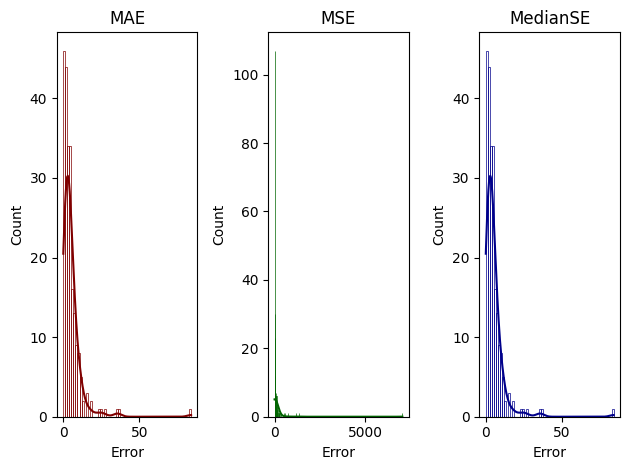

In [60]:
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.histplot(mean_ab_error,ax = ax1, color = 'maroon',kde = True, fill = False)
sns.histplot(mean_sq_error, ax = ax2, color = 'darkgreen', kde = True, fill = False)
sns.histplot(median_error, ax = ax3, color = 'darkblue', kde = True, fill = False)
ax1.set_title("MAE")
ax2.set_title("MSE")
ax3.set_title("MedianSE")
ax1.set_xlabel("Error")
ax2.set_xlabel("Error")
ax3.set_xlabel("Error")
plt.tight_layout()

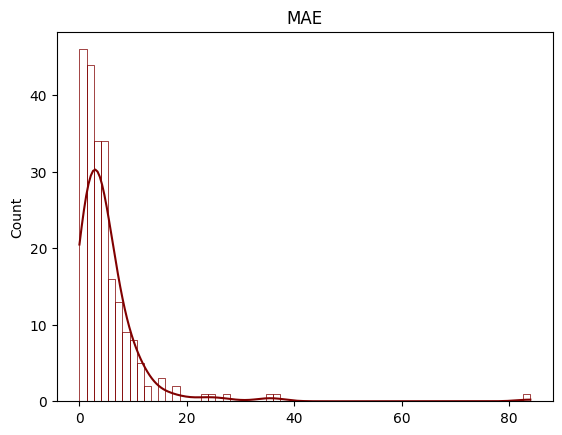

In [118]:
sns.histplot(mean_ab_error, color = 'maroon',kde = True, fill = False)
plt.title("MAE");

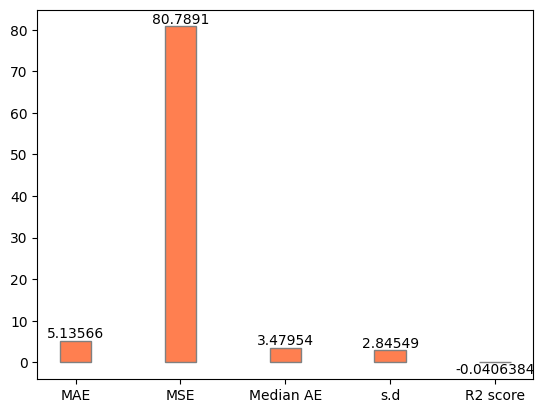

In [125]:
x_data = ('MAE','MSE','Median AE','s.d','R2 score')
y_data = [MAE,MSE,Median,SD,r2]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge');

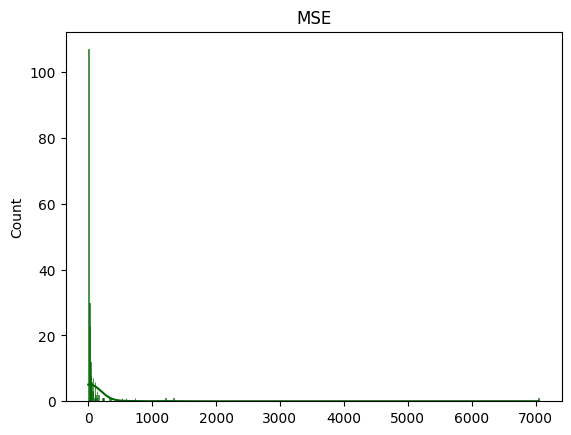

In [122]:
sns.histplot(mean_sq_error, color = 'darkgreen', kde = True, fill = False)
plt.title("MSE");

Text(0.5, 1.0, 'Median AE')

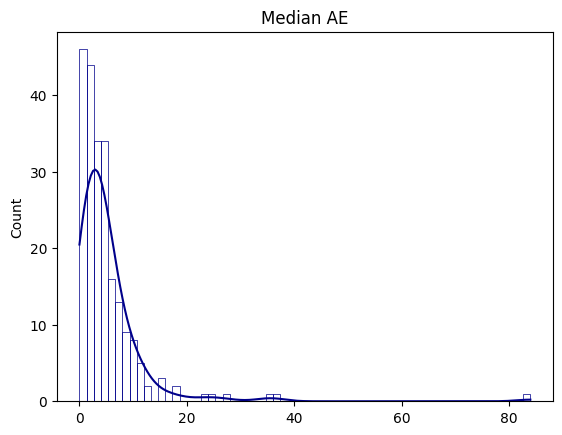

In [124]:
sns.histplot(median_error, color = 'darkblue', kde = True, fill = False)
plt.title("Median AE")

In [207]:
loo = LeaveOneOut()
reg = linear_model.Ridge(alpha=1.0)
y = np.array(y)
X1 = np.array(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    reg.fit(X_train,y_train)
    
    predict_data = reg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 5.1185735459689345
MSE of the model is 80.64772297760028
Median absolute error of the model is 3.4108328591752413
Standard Deviation of the model is 2.8038447811536744
R2 score of the model is -0.038816927843439375


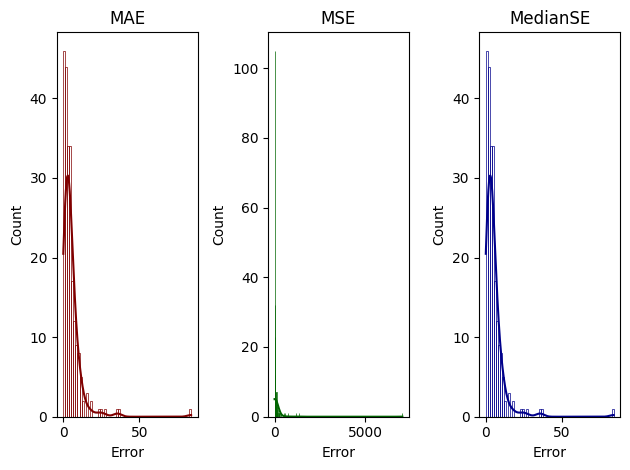

In [140]:
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.histplot(mean_ab_error,ax = ax1, color = 'maroon',kde = True, fill = False)
sns.histplot(mean_sq_error, ax = ax2, color = 'darkgreen', kde = True, fill = False)
sns.histplot(median_error, ax = ax3, color = 'darkblue', kde = True, fill = False)
ax1.set_title("MAE")
ax2.set_title("MSE")
ax3.set_title("MedianSE")
ax1.set_xlabel("Error")
ax2.set_xlabel("Error")
ax3.set_xlabel("Error")
plt.tight_layout()

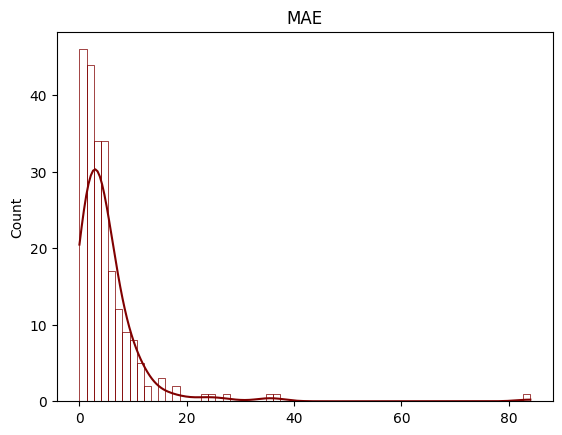

In [141]:
sns.histplot(mean_ab_error, color = 'maroon',kde = True, fill = False)
plt.title("MAE");

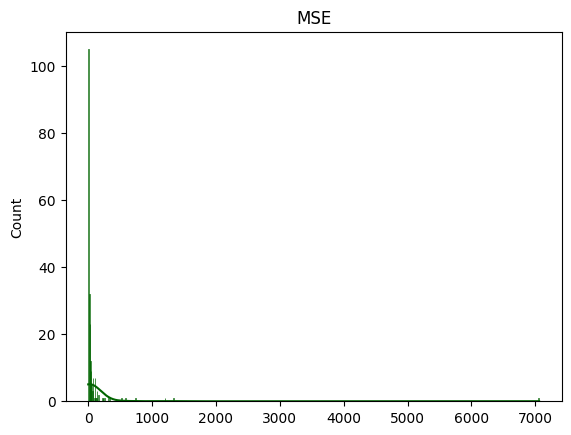

In [142]:
sns.histplot(mean_sq_error, color = 'darkgreen', kde = True, fill = False)
plt.title("MSE");

Text(0.5, 1.0, 'Median AE')

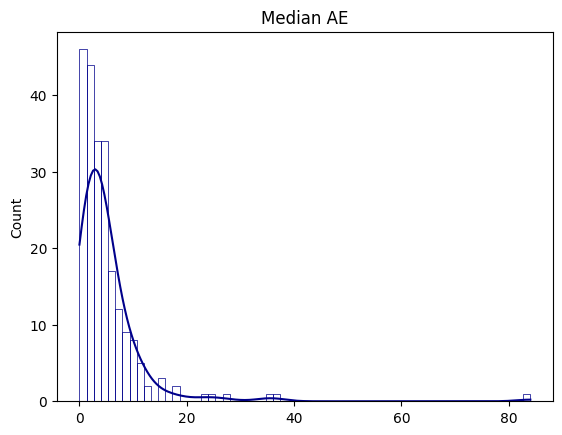

In [143]:
sns.histplot(median_error, color = 'darkblue', kde = True, fill = False)
plt.title("Median AE")

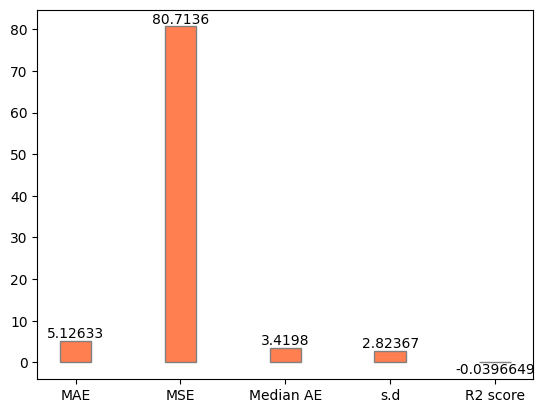

In [144]:
x_data = ('MAE','MSE','Median AE','s.d','R2 score')
y_data = [MAE,MSE,Median,SD,r2]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge');

In [208]:
#Lasso model
loo = LeaveOneOut()
model_lasso = Lasso(alpha=1.0)
y = np.array(y)
X1 = np.array(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model_lasso.fit(X_train,y_train)
    
    predict_data = model_lasso.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.94162513671732
MSE of the model is 78.3510927128886
Median absolute error of the model is 3.5831186300467244
Standard Deviation of the model is 1.9855984109487335
R2 score of the model is -0.009234215425846237


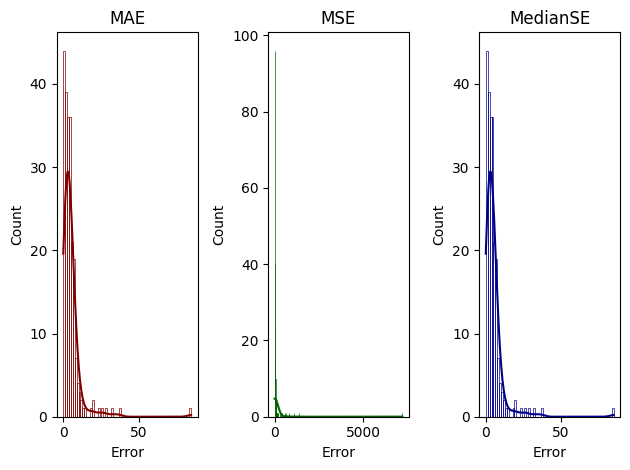

In [196]:
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.histplot(mean_ab_error,ax = ax1, color = 'maroon',kde = True, fill = False)
sns.histplot(mean_sq_error, ax = ax2, color = 'darkgreen', kde = True, fill = False)
sns.histplot(median_error, ax = ax3, color = 'darkblue', kde = True, fill = False)
ax1.set_title("MAE")
ax2.set_title("MSE")
ax3.set_title("MedianSE")
ax1.set_xlabel("Error")
ax2.set_xlabel("Error")
ax3.set_xlabel("Error")
plt.tight_layout()

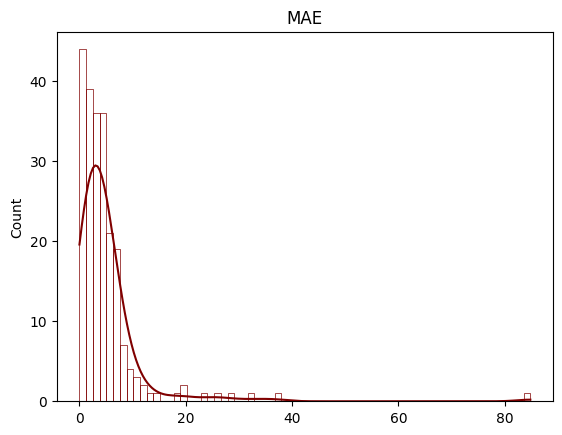

In [197]:
sns.histplot(mean_ab_error, color = 'maroon',kde = True, fill = False)
plt.title("MAE");

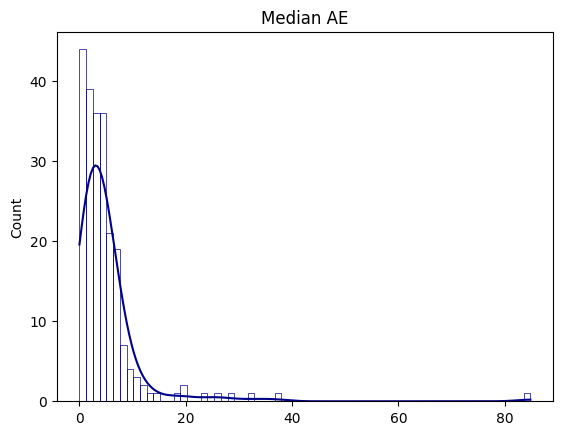

In [198]:
sns.histplot(median_error, color = 'darkblue', kde = True, fill = False)
plt.title("Median AE");

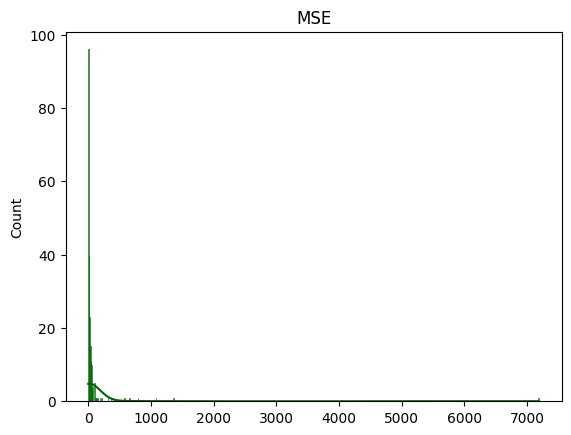

In [199]:
sns.histplot(mean_sq_error, color = 'darkgreen', kde = True, fill = False)
plt.title("MSE");

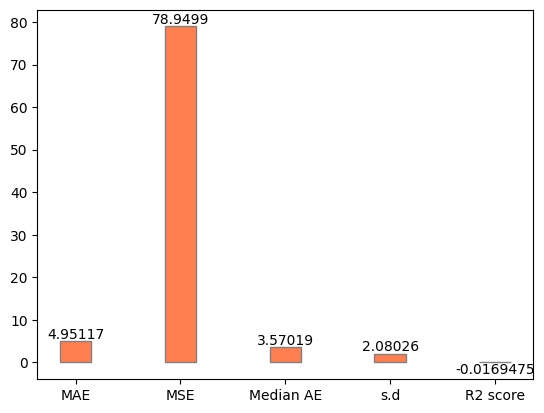

In [200]:
x_data = ('MAE','MSE','Median AE','s.d','R2 score')
y_data = [MAE,MSE,Median,SD,r2]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge');

In [213]:
#Elastic model
loo = LeaveOneOut()
model_enet = ElasticNet(alpha=1.0)
y = np.array(y)
X1 = np.array(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model_enet.fit(X_train,y_train)
    
    predict_data = model_enet.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.946224652121305
MSE of the model is 78.7640853349247
Median absolute error of the model is 3.582448694548072
Standard Deviation of the model is 2.067675054644345
R2 score of the model is -0.014553940658072806


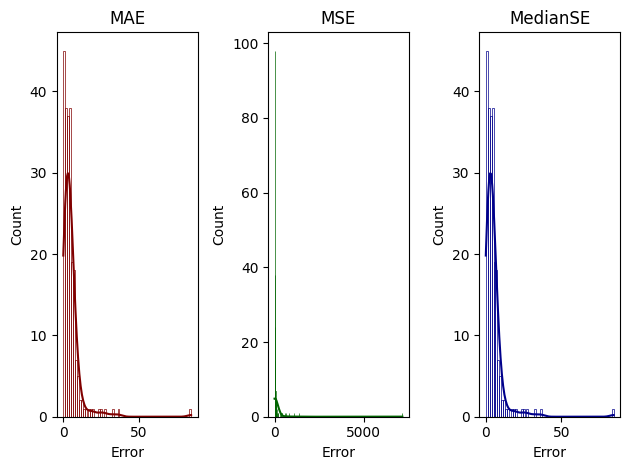

In [214]:
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.histplot(mean_ab_error,ax = ax1, color = 'maroon',kde = True, fill = False)
sns.histplot(mean_sq_error, ax = ax2, color = 'darkgreen', kde = True, fill = False)
sns.histplot(median_error, ax = ax3, color = 'darkblue', kde = True, fill = False)
ax1.set_title("MAE")
ax2.set_title("MSE")
ax3.set_title("MedianSE")
ax1.set_xlabel("Error")
ax2.set_xlabel("Error")
ax3.set_xlabel("Error")
plt.tight_layout()

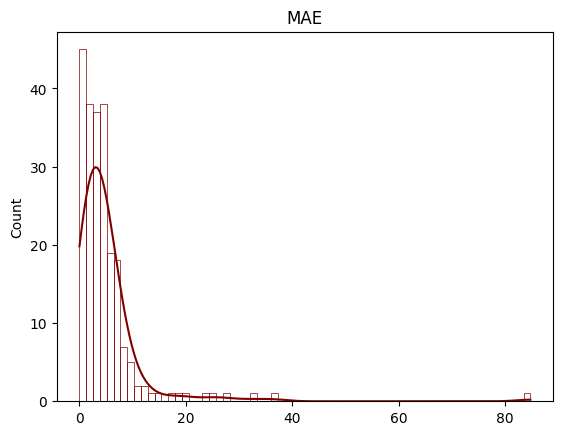

In [215]:
sns.histplot(mean_ab_error, color = 'maroon',kde = True, fill = False)
plt.title("MAE");

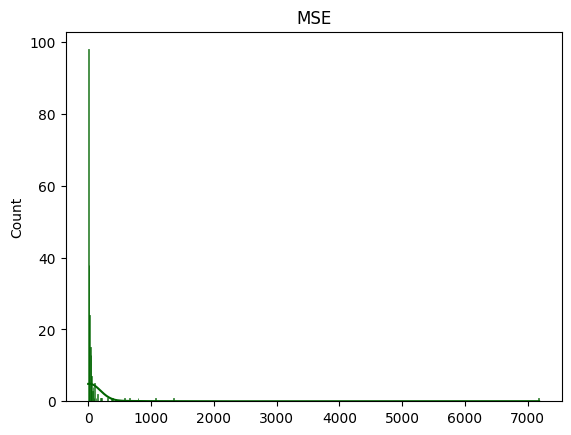

In [216]:
sns.histplot(mean_sq_error, color = 'darkgreen', kde = True, fill = False)
plt.title("MSE");

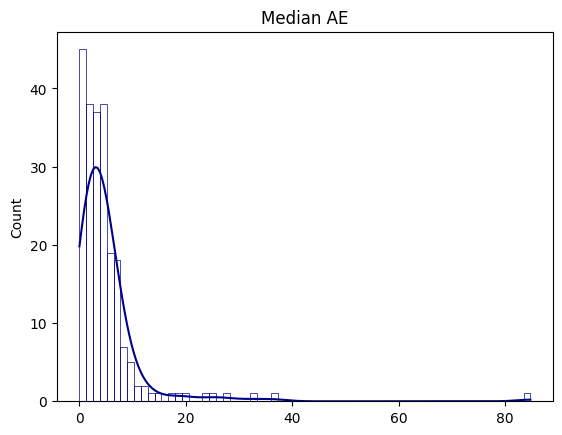

In [217]:
sns.histplot(median_error, color = 'darkblue', kde = True, fill = False)
plt.title("Median AE");

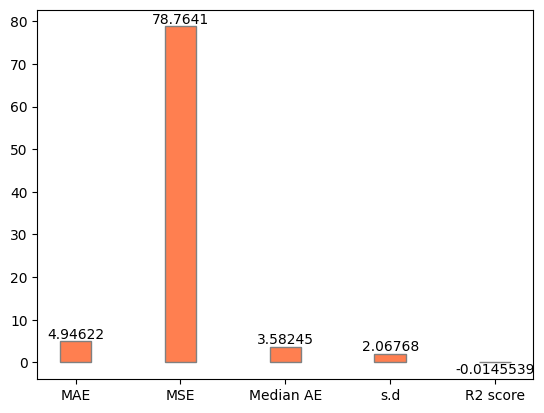

In [218]:
x_data = ('MAE','MSE','Median AE','s.d','R2 score')
y_data = [MAE,MSE,Median,SD,r2]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge');